# Sparsity with MirrorCBO
## Imports
We need numpy and the CBXPy package. 

- `MirrorCBO` is the main class for the Mirror CBO algorithm.
- `ElasticNet` is a specific mirror map that we will use in this example.
- `scheduler` is used to adjust parameters during optimization.

In [2]:
from cbx.dynamics.mirrorcbo import MirrorCBO, ElasticNet
from cbx.scheduler import multiply
import numpy as np
import matplotlib.pyplot as plt

## Create a synthetic optimization problem

We consider sparse signal recovery. We create a random matrix A and a sparse vector x0, and we observe b = A x0 + noise. The goal is to recover x0 from A and b. The loss function is the least squares loss.


In [13]:
dim = 30
num_signals = 3
sigma = 0.01
A = np.random.randn(dim, dim)
x_true = np.zeros(dim)
idx    = np.random.permutation(dim)[:num_signals]
x_true[idx] = np.random.randn(num_signals)
meas = A @ x_true + sigma * np.random.randn(dim)

def loss(x):
    return 0.5 * np.linalg.norm(x @ A.T - meas, axis=-1)**2

## Run the Mirror CBO algorithm

We create an instance of the `MirrorCBO` class with the specified parameters, including the mirror map, noise type, and time step. We then call the `optimize` method to run the optimization process. We use a scheduler to adjust parameters during optimization.

Note: CBO performance is sensitive. Finetuning for different problems might be necessary.

In [14]:
dyn = MirrorCBO(loss, N= 50, d = dim, mirrormap=ElasticNet(1.9),
                noise = 'anisotropic', sigma = 2.,
                dt = 0.05,
                max_it=500)
sched = multiply(factor = 1.1)
dyn.optimize(sched=sched)
x = dyn.best_particle[0,:]

....................
Starting Optimization with dynamic: MirrorCBO
....................
Time: 0.050, best current energy: [81.05952792]
Number of function evaluations: [100]
Time: 0.100, best current energy: [81.05952878]
Number of function evaluations: [150]
Time: 0.150, best current energy: [81.05952878]
Number of function evaluations: [200]
Time: 0.200, best current energy: [55.92274668]
Number of function evaluations: [250]
Time: 0.250, best current energy: [44.22662401]
Number of function evaluations: [300]
Time: 0.300, best current energy: [44.22662368]
Number of function evaluations: [350]
Time: 0.350, best current energy: [44.22662368]
Number of function evaluations: [400]
Time: 0.400, best current energy: [44.22662368]
Number of function evaluations: [450]
Time: 0.450, best current energy: [44.22662368]
Number of function evaluations: [500]
Time: 0.500, best current energy: [44.22662368]
Number of function evaluations: [550]
Time: 0.550, best current energy: [38.05776027]
Numb

## Plot results

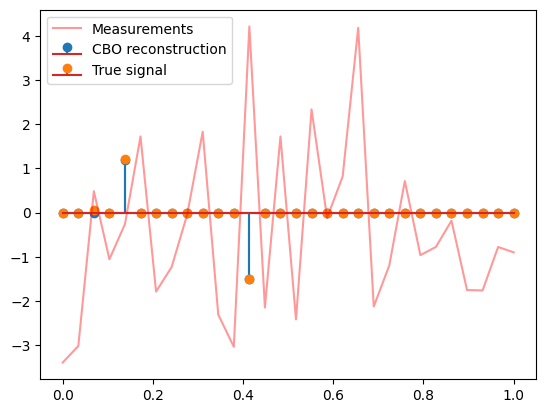

In [20]:
s = np.linspace(0,1, dim)
plt.stem(s, x, '-o', label='CBO reconstruction')
plt.stem(s, x_true, '-o', label='True signal')
plt.plot(s, meas, color='r', alpha=0.4, label='Measurements')
plt.legend()